In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Описательные статистики
1. Выведите описательные статистики числовых переменных
2. Какие выводы можно сделать?

### Одномерный анализ
1. Визуализируйте распределения числовых переменных с помощью гистограмм и боксплотов. Охарайктеризуйте распределения всех переменных
2. Визуализируйте категориальные переменные с помощью гистограмм (проведите необходимые преобразования если необходимо)
3. Создайе преобразованные колонки Price и Kilometers_Driven. Преобразование сделайте с помощью натурального логарифма (np.log1p)
4. Сравните распределение изначальный колонок и преобразованных

### Двумерный анализ
1. Постройте парные графики между числовыми переменными с помощью функции sns.pairplot
2. Сократите число столбцов, оставив только те пары, между которыми прослеживается взаимосвязь
3. Какие выводы можно сделать из парных графиков?
4. Исследуйте взаимосвязь цены (а также логарифмированной цены) и категориальных переменных с момощью столбчатых диаграмм
5. Включите в анализ из 4-го пункта переменные Seats и Car_age

### Многомерный анализ и заполнение пропусков
1. Постройте хит мап, измеряющий корреляции между переменными. Проинтерпретируйте результаты
2. Преобразуйте значения нулевого расхода топлива в пропуски. Проанализируйте получившееся количество пропусков
3. Заполните пропуски в столбцах Mileage, Engine, Power, Seats, New_Price, Price наиболее подходящим методом.
4. Сформируйте по одному предположению в данных, которые можно проверить с помощью ml-моделей и тестов

### Разбор ДЗ №15

Сгенерируйте 10 000 пар значений из равномерного распределения от 0 до 1. Вычислите сумму каждой пары и постройте гистограмму сумм.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
np.random.seed(42)

In [14]:
pairs = np.random.uniform(0, 1, (10000, 2))
pairs

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       ...,
       [0.9010385 , 0.87703863],
       [0.04681396, 0.30369847],
       [0.44332001, 0.17226481]])

In [15]:
sums = pairs.sum(axis=1)
sums

array([1.32525443, 1.33065243, 0.31201316, ..., 1.77807713, 0.35051243,
       0.61558482])

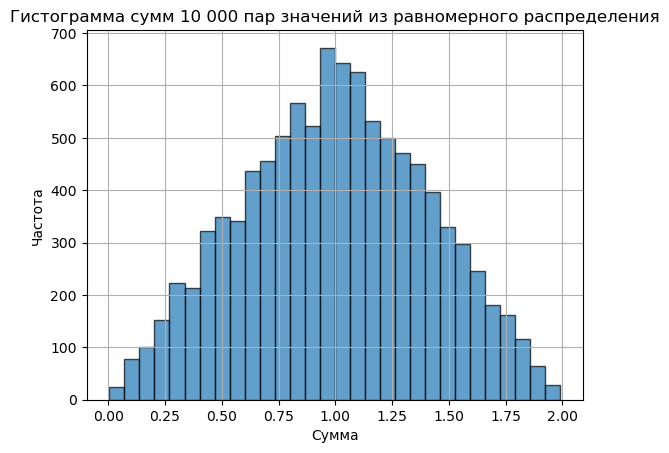

In [16]:
plt.hist(sums, bins=30, edgecolor='k', alpha=0.7)
plt.title('Гистограмма сумм 10 000 пар значений из равномерного распределения')
plt.xlabel('Сумма')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

При определенных условиях распределение Пуассона можно использовать в качестве приближения к биномиальному распределению:

Число испытаний 𝑛 велико.

Вероятность успеха 𝑝 мала.

Произведение 𝑛𝑝 (среднее значение биномиального распределения) конечное и равно 𝜆.

Пример:

Если у вас есть биномиальное распределение с 𝑛=1000 и 𝑝=0.003, вы можете аппроксимировать его, используя распределение Пуассона с 𝜆=𝑛𝑝=3.


Задача: сгенерировать случайные величины с биномиальным распределением, сгенерировать пуассоновские распределенные случайные величины с 𝜆 = 𝑛𝑝, построить графики распределений рядом друг с другом.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

In [18]:
n = 1000
p = 0.003
apr_poisson = n * p
apr_poisson

3.0

In [19]:
binom_i = binom.rvs(n, p, size=10000)
poisson_i = poisson.rvs(apr_poisson, size=10000)

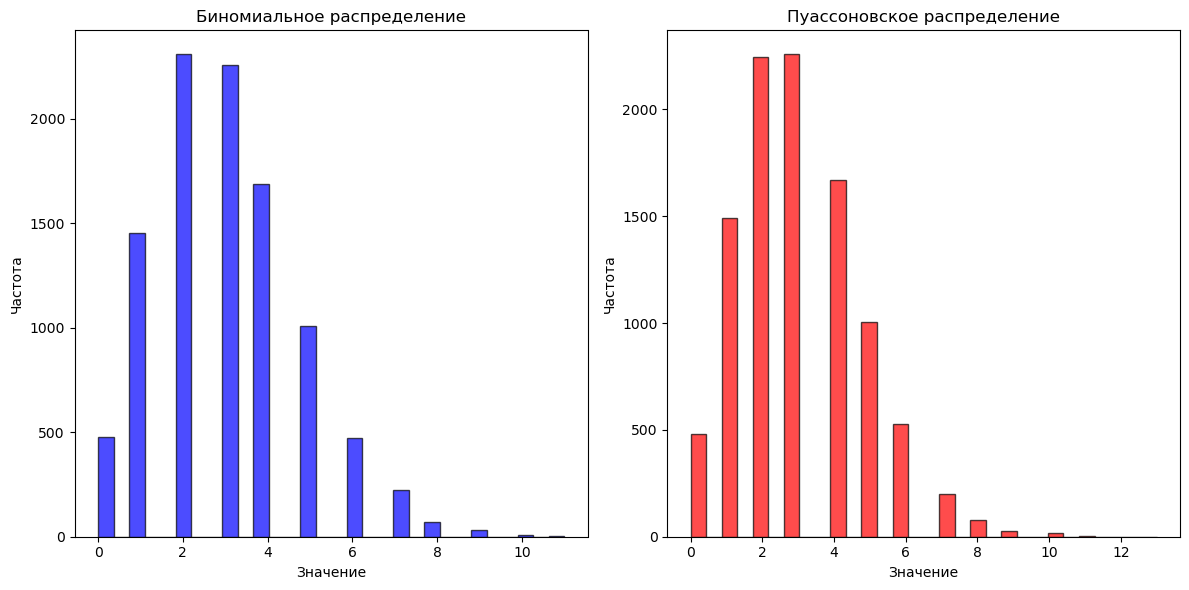

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(binom_i, bins=30, color='blue', alpha=0.7, edgecolor='k')
ax1.set_title('Биномиальное распределение')
ax1.set_xlabel('Значение')
ax1.set_ylabel('Частота')

# Гистограмма пуассоновского распределения
ax2.hist(poisson_i, bins=30, color='red', alpha=0.7, edgecolor='k')
ax2.set_title('Пуассоновское распределение')
ax2.set_xlabel('Значение')
ax2.set_ylabel('Частота')

plt.tight_layout()
plt.show()

### Разбор ДЗ №16

Компания оценивает своих сотрудников по трем показателям: продажи, удовлетворенность клиентов и пунктуальность. Среднее значение и стандартное отклонение для каждого показателя следующие:
Продажи: Среднее = 500, Стандартное отклонение = 50

Удовлетворенность клиентов: Среднее = 80, Стандартное отклонение = 10

Пунктуальность: Среднее = 95, Стандартное отклонение = 5

У сотрудника следующие показатели:

Продажи: 550

Удовлетворенность клиентов: 85

Пунктуальность: 90

Рассчитайте Z-баллы для каждой метрики и определите, в какой метрике сотрудник показал лучшие результаты по сравнению со средним показателем по компании.

In [21]:
metrics = {
    "Продажи": {"mean": 500, "std_dev": 50},
    "Удовлетворенность клиентов": {"mean": 80, "std_dev": 10},
    "Пунктуальность": {"mean": 95, "std_dev": 5},
}

employee_metrics = {
    "Продажи": 550,
    "Удовлетворенность клиентов": 85,
    "Пунктуальность": 90,
}

def calculate_z_score(value, mean, std_dev):
    return (value - mean) / std_dev

z_scores = {}
for metric, stats in metrics.items():
    z_scores[metric] = calculate_z_score(employee_metrics[metric], stats["mean"], stats["std_dev"])

print(z_scores)

{'Продажи': 1.0, 'Удовлетворенность клиентов': 0.5, 'Пунктуальность': -1.0}


Среднее время выполнения задания на фабрике составляет 30 минут со стандартным отклонением 5 минут. Рассчитайте вероятность того, что выполнение случайно выбранной задачи займет от 25 до 35 минут. Используйте коэффициент Z и таблицу стандартного нормального распределения

In [22]:
import scipy.stats as stats

mu = 30
sigma = 5

z1 = (25 - mu) / sigma
z2 = (35 - mu) / sigma

p1 = stats.norm.cdf(z1)
p2 = stats.norm.cdf(z2)

probability = p2 - p1
probability

0.6826894921370859

Определенное заболевание поражает 1% населения. Тест на это заболевание имеет 99 % чувствительности (истинно положительный результат) и 2 % ложноположительных результатов. Если у человека положительный тест, какова вероятность того, что у него действительно есть болезнь?

In [24]:
P_D = 0.01 
P_not_D = 0.99
P_T_given_D = 0.99 
P_T_given_not_D = 0.02

P_T = (P_T_given_D * P_D) + (P_T_given_not_D * P_not_D)
print(P_T)

P_D_given_T = (P_T_given_D * P_D) / P_T

print(f"Вероятность того, что у человека действительно есть болезнь при положительном тесте: {P_D_given_T:.4f}")

0.029700000000000004
Вероятность того, что у человека действительно есть болезнь при положительном тесте: 0.3333
